In [1]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [2]:
train_dir=r"C:/Users/HP/OneDrive/Desktop/Facial Expressions/images/train"
test_dir=r"C:/Users/HP/OneDrive/Desktop/Facial Expressions/images/validation"

In [3]:
batch_size = 1
img_height = 48
img_width = 48

In [41]:
train_image_generator = ImageDataGenerator(rescale=1./255,rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
                                           )
train_data_gen = train_image_generator.flow_from_directory(color_mode='rgb',directory=train_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 28821 images belonging to 7 classes.


In [40]:
val_image_generator = ImageDataGenerator(rescale=1./255)
val_data_gen = val_image_generator.flow_from_directory(color_mode='rgb',directory=test_dir,shuffle=True,target_size=(img_height, img_width),class_mode='categorical')

Found 7066 images belonging to 7 classes.


In [20]:
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

In [22]:
img, label = train_data_gen.__next__()

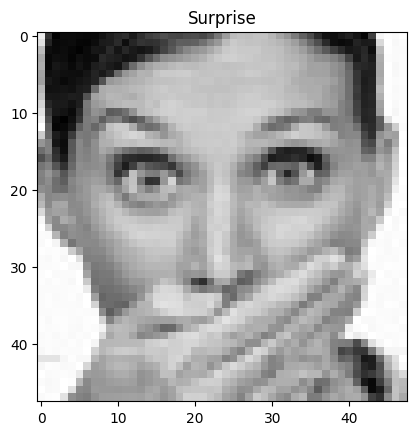

In [23]:
import random

i=random.randint(0, (img.shape[0])-1)
image = img[i]
labl = class_labels[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(labl)
plt.show()

In [19]:
import warnings


import os
import glob
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization

In [24]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(30, (3,3), activation='relu', input_shape=(48, 48, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(40, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(30, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(7, activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 47, 47, 30)        150       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 40)        4840      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 40)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        4830      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 30)         0

In [25]:
model.compile(optimizer= 'adam' , loss= 'categorical_crossentropy', metrics=['accuracy'])

In [26]:
history = model.fit(train_data_gen, epochs=60,
validation_data= val_data_gen,)

Epoch 1/60
901/901 [==============================] - 130s 142ms/step - loss: 1.7494 - accuracy: 0.2834 - val_loss: 1.5543 - val_accuracy: 0.4004
Epoch 2/60
901/901 [==============================] - 128s 142ms/step - loss: 1.5351 - accuracy: 0.4032 - val_loss: 1.3871 - val_accuracy: 0.4693
Epoch 3/60
901/901 [==============================] - 123s 137ms/step - loss: 1.4366 - accuracy: 0.4452 - val_loss: 1.3324 - val_accuracy: 0.4901
Epoch 4/60
901/901 [==============================] - 104s 116ms/step - loss: 1.3840 - accuracy: 0.4727 - val_loss: 1.2753 - val_accuracy: 0.5146
Epoch 5/60
901/901 [==============================] - 100s 111ms/step - loss: 1.3412 - accuracy: 0.4875 - val_loss: 1.2596 - val_accuracy: 0.5224
Epoch 6/60
901/901 [==============================] - 96s 106ms/step - loss: 1.3144 - accuracy: 0.5005 - val_loss: 1.2174 - val_accuracy: 0.5369
Epoch 7/60
901/901 [==============================] - 99s 109ms/step - loss: 1.2884 - accuracy: 0.5066 - val_loss: 1.1911 - v

In [1]:
model.save('model.h5')

NameError: name 'model' is not defined